In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Step 2: Import models
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [11]:
# Step 3: Load CSV file
df = pd.read_csv('gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
# Step 4: Split data
X = df.drop('gender', axis=1)
y = df['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Step 5: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Extra Tree": ExtraTreeClassifier(),
    "Linear SVM": LinearSVC(max_iter=2000),
    "SVM (RBF)": SVC(),
    "Gaussian NB": GaussianNB(),
    "Multinomial NB": MultinomialNB(),
    "Bernoulli NB": BernoulliNB(),
    "Complement NB": ComplementNB(),
    "Ridge Classifier": RidgeClassifier(),
    "Perceptron": Perceptron(),
    "Passive Aggressive": PassiveAggressiveClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

In [10]:
# Step 6: Train and test models
results = {}
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        results[name] = acc
        print(f"{name}: {acc:.4f}")
    except:
        print(f"{name}: Error")

Logistic Regression: 0.9650
KNN: 0.9650
Decision Tree: 0.9570
Random Forest: 0.9630
Extra Trees: 0.9630
Gradient Boosting: 0.9670
AdaBoost: 0.9650
Bagging: 0.9650
Extra Tree: 0.9570
Linear SVM: 0.9610
SVM (RBF): 0.9660
Gaussian NB: 0.9680
Multinomial NB: 0.9550
Bernoulli NB: 0.9530
Complement NB: 0.9550
Ridge Classifier: 0.9660
Perceptron: 0.9471
Passive Aggressive: 0.9491
LDA: 0.9660
QDA: 0.9640


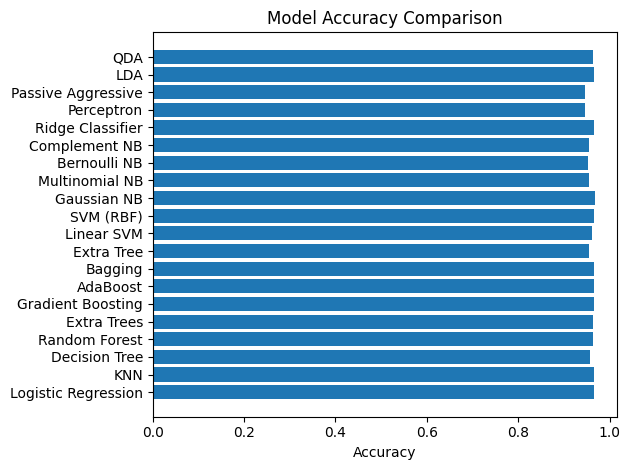

In [7]:
# Step 7: Compare results
plt.barh(list(results.keys()), list(results.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.tight_layout()
plt.show()

In [8]:
# Step 8: Best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} (Accuracy: {results[best_model_name]:.2f})")


Best Model: Gaussian NB (Accuracy: 0.97)


In [9]:
# Step 9: Take user input for prediction
print("\nEnter the following values for prediction:")

# Adjust according to your dataset columns
user_data = {}
for col in X.columns:
    val = float(input(f"{col}: "))
    user_data[col] = val

# Convert to DataFrame for prediction
sample = pd.DataFrame([user_data])

# Predict gender
prediction = best_model.predict(sample)
print("\nPredicted Gender:", prediction[0])


Enter the following values for prediction:


ValueError: could not convert string to float: ''